In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import Series
from datetime import datetime
df=pd.read_csv("C:\\Users\\Eric Gao\\Downloads\\datasets\\monthly-beer-production-in-austr.csv", parse_dates=["Month"])
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [2]:
df["Month"]=pd.to_datetime(df["Month"])
df.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [3]:
df["Day"]=df.Month.dt.day
df["Year"]=df.Month.dt.year
df["months"]=df.Month.dt.month
df["Day of week"]=df.Month.dt.dayofweek
df["Week"]=df.Month.dt.week
def applyer(row):
    if row.dayofweek==5 and row.dayofweek==6:
        return 1
    else:
        return 0
temp2=df["Month"].apply(applyer)
df["Weekend"]=temp2
df.head()
df.tail()
df.sample(4)

,Month,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
351,1985-04-01,148.3,1,1985,4,0,14,0
377,1987-06-01,126.4,1,1987,6,0,23,0
288,1980-01-01,170.0,1,1980,1,1,1,0
326,1983-03-01,184.9,1,1983,3,1,9,0


Text(0, 0.5, 'Beer production')

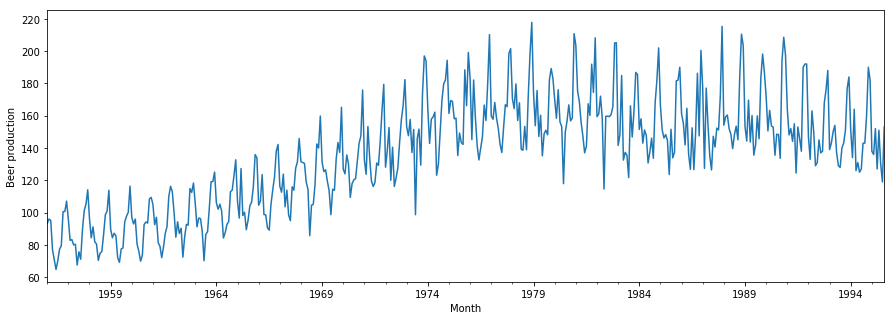

In [4]:
#Data Visualization
df.index=df.Month
plt.figure(figsize=(15,5))
df["Monthly beer production"].plot()
plt.xlabel("Month")
plt.ylabel("Beer production")

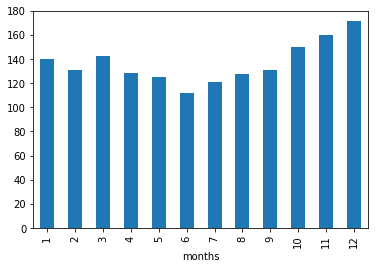

In [5]:
#months vs beer production
df.groupby("months")["Monthly beer production"].mean().plot.bar()

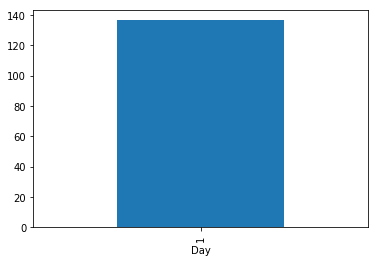

In [6]:
#Days vs beer production
df.groupby("Day")["Monthly beer production"].mean().plot.bar()
#No other day besides the 1st

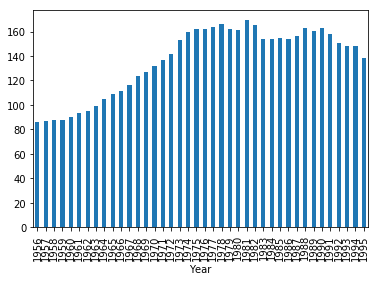

In [7]:
#Years vs beer production
df.groupby("Year")["Monthly beer production"].mean().plot.bar()

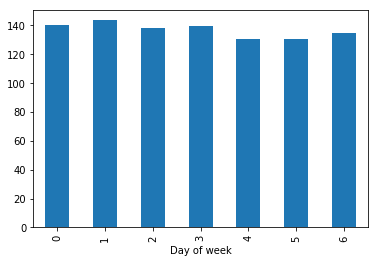

In [8]:
#Day of week vs beer production
df.groupby("Day of week")["Monthly beer production"].mean().plot.bar()

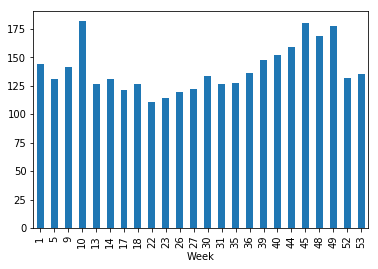

In [9]:
#Week number vs beer production
df.groupby("Week")["Monthly beer production"].mean().plot.bar()
#Peaks at weeks 10, 45, 49

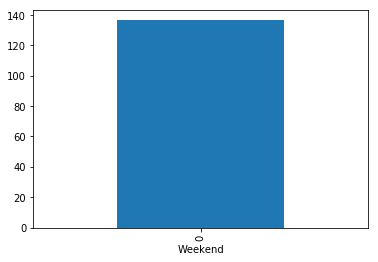

In [10]:
#Day of week vs beer production
df.groupby("Weekend")["Monthly beer production"].mean().plot.bar()
#No weekend values

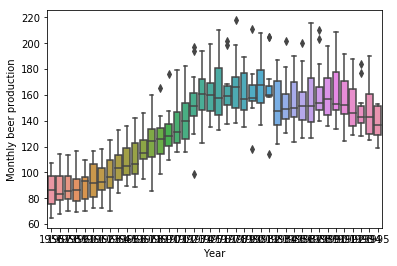

In [11]:
#Using seaborn
sns.boxplot(x=df.Year, y=df["Monthly beer production"])

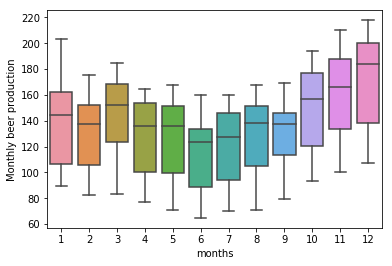

In [12]:
sns.boxplot(x=df['months'], y=df["Monthly beer production"])

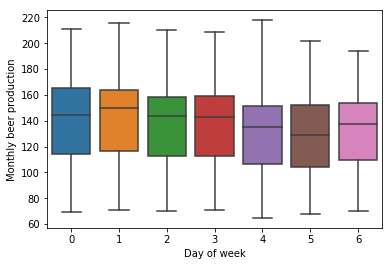

In [13]:
sns.boxplot(x=df["Day of week"], y=df["Monthly beer production"])

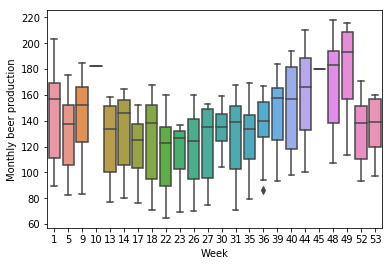

In [14]:
sns.boxplot(x=df.Week, y=df["Monthly beer production"])

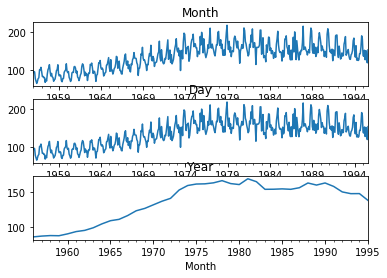

In [15]:
#resampling
month=df.resample("M").mean()
day=df.resample("D").mean()
year=df.resample("Y").mean()
day.dropna(inplace=True)
fig,ax=plt.subplots(3,1)
month["Monthly beer production"].plot(label="Month",title="Month",ax=ax[0])
day["Monthly beer production"].plot(label="Days", title="Day", ax=ax[1])
year["Monthly beer production"].plot(label="Years",title="Year", ax=ax[2])
#Use month

In [16]:
df.Timestamp=pd.to_datetime(df.Month)
df.index=df.Timestamp
df=df.resample("M").mean()

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [17]:
df.head()

,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
Month,,,,,,,
1956-01-31,93.2,1,1956,1,6,52,0
1956-02-29,96.0,1,1956,2,2,5,0
1956-03-31,95.2,1,1956,3,3,9,0
1956-04-30,77.1,1,1956,4,6,13,0
1956-05-31,70.9,1,1956,5,1,18,0


In [18]:
len(df)*0.7

333.2

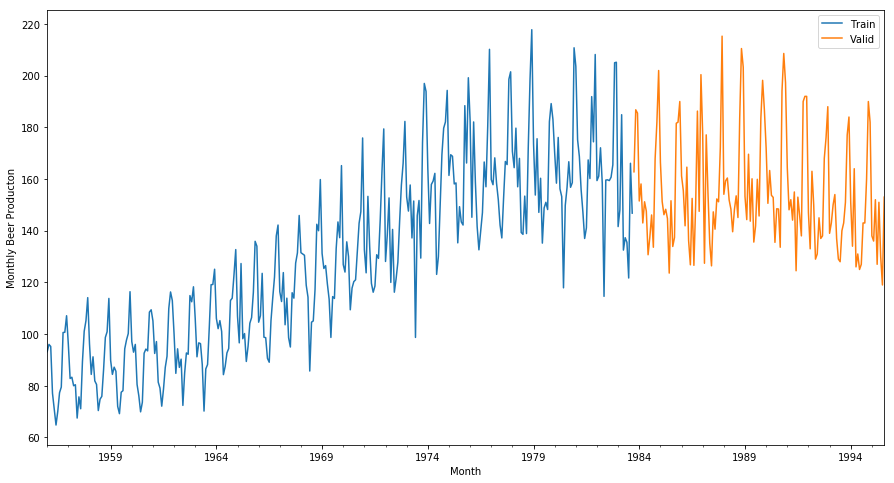

In [19]:
train=df.iloc[0:333]
valid=df.iloc[333:]
plt.figure(figsize=(15,8))
train["Monthly beer production"].plot(label="Train")
valid["Monthly beer production"].plot(label="Valid")
plt.xlabel("Month")
plt.ylabel("Monthly Beer Producton")
plt.legend(loc="best")

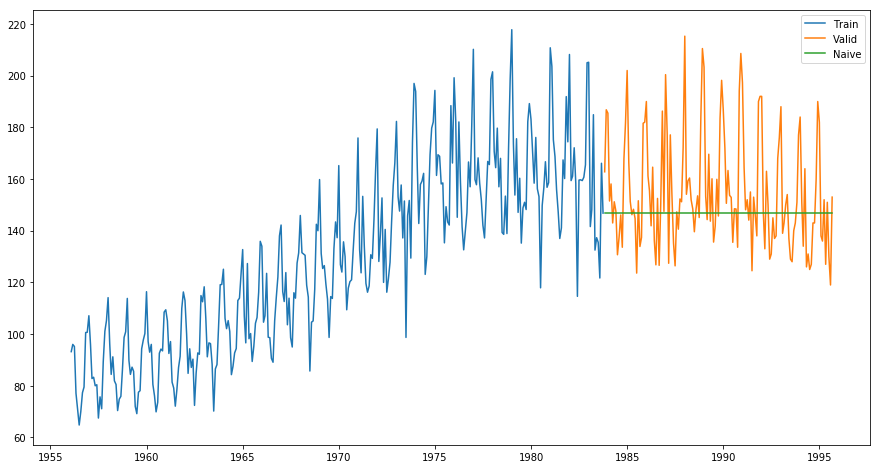

In [20]:
#Naive Approach
arr=np.asarray(train["Monthly beer production"])
y_hat=valid.copy()
y_hat["naive"]=arr[len(arr)-1]
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["naive"], label="Naive")
plt.legend(loc="best")

In [21]:
rms=np.sqrt(mean_squared_error(y_hat["naive"], valid["Monthly beer production"]))
rms

23.030973367744018

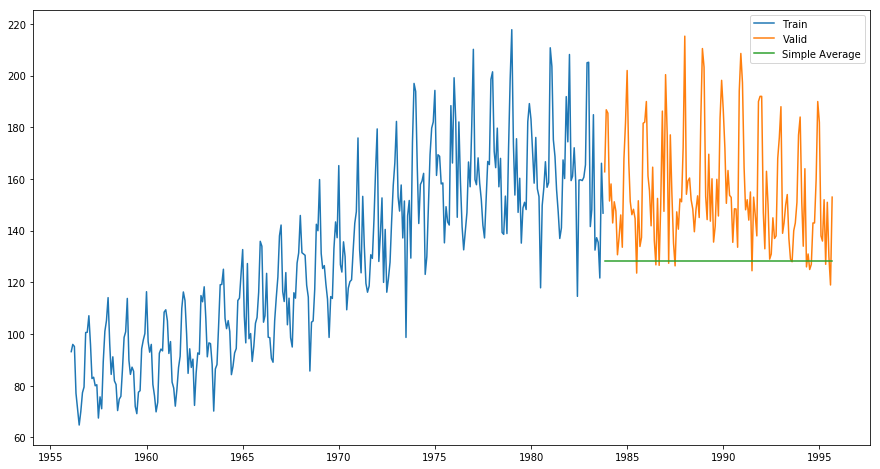

In [22]:
#simple average forecast
y_hat=valid.copy()
y_hat["Simple Average Forecast"]=np.asarray(train["Monthly beer production"]).mean()
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["Simple Average Forecast"], label="Simple Average")
plt.legend(loc="best")

In [23]:
rmse=np.sqrt(mean_squared_error(y_hat["Simple Average Forecast"], valid["Monthly beer production"]))
rmse

34.239530504188444

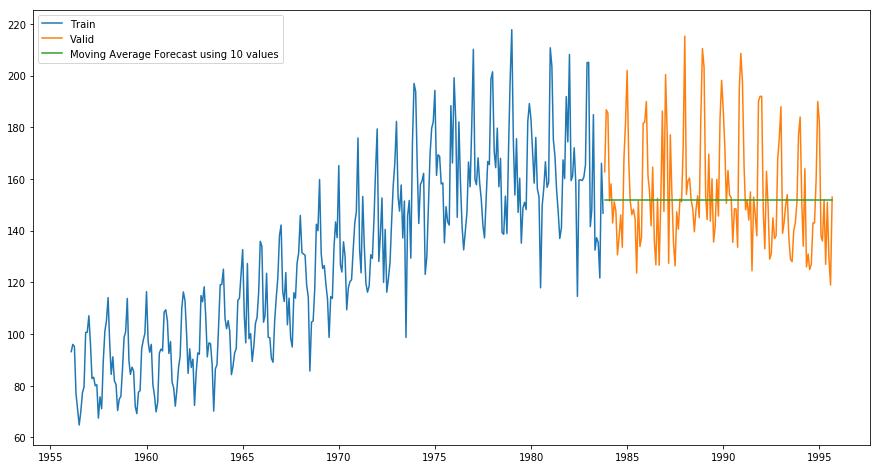

In [24]:
#Moving Average Forecast
y_hat=valid.copy()
y_hat["Moving Average Forecast using 10 Values"]=train["Monthly beer production"].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["Moving Average Forecast using 10 Values"], label="Moving Average Forecast using 10 values")
plt.legend(loc="best")

In [25]:
rmse=np.sqrt(mean_squared_error(y_hat["Moving Average Forecast using 10 Values"], valid["Monthly beer production"]))
rmse

21.726343891256054

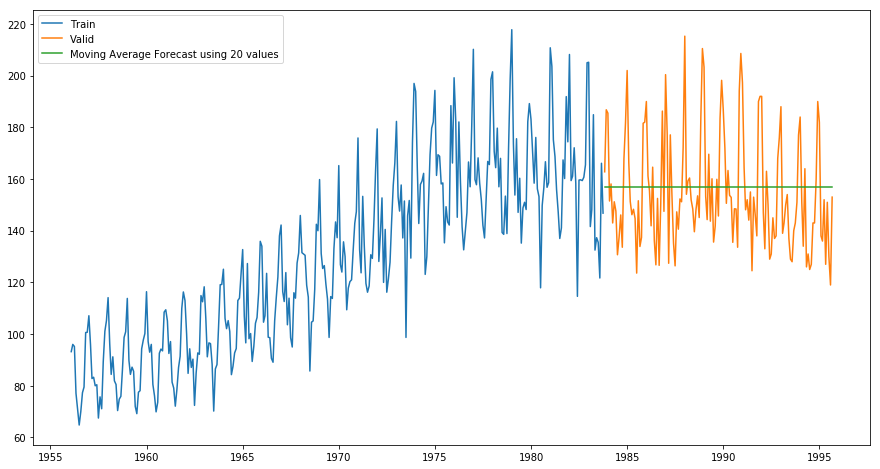

In [26]:
#Moving Average Forecast
y_hat=valid.copy()
y_hat["Moving Average Forecast using 20 Values"]=train["Monthly beer production"].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["Moving Average Forecast using 20 Values"], label="Moving Average Forecast using 20 values")
plt.legend(loc="best")

In [27]:
rmse=np.sqrt(mean_squared_error(y_hat["Moving Average Forecast using 20 Values"], valid["Monthly beer production"]))
rmse

21.581175152873882

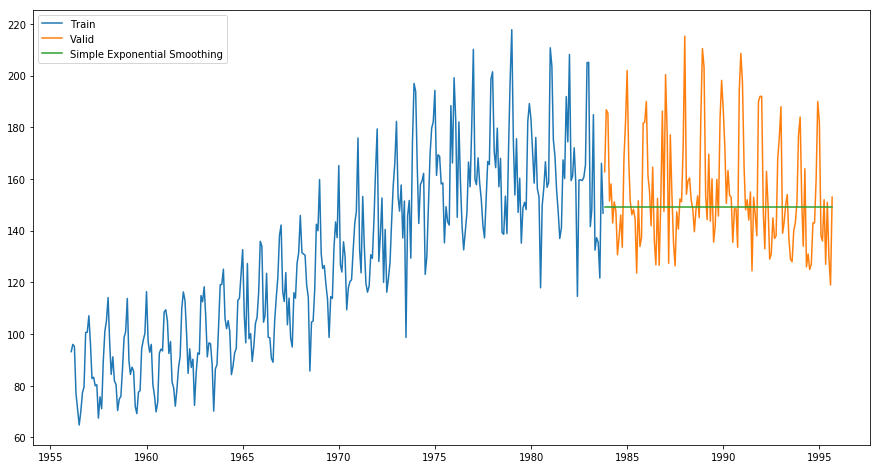

In [28]:
#Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat=valid.copy()
fit=SimpleExpSmoothing(np.asarray(train["Monthly beer production"])).fit(smoothing_level=0.8, optimized=False)
y_hat["SES"]=fit.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["SES"], label="Simple Exponential Smoothing")
plt.legend(loc="best")

In [29]:
rmse=np.sqrt(mean_squared_error(y_hat["SES"], valid["Monthly beer production"]))
rmse

22.339663951068335

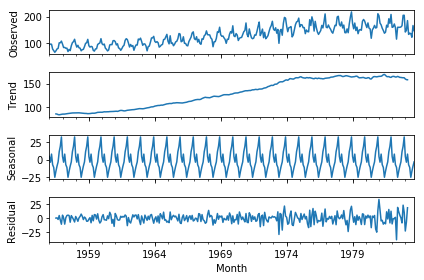

In [30]:
#Holt's Linear Model
#Decompose
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train["Monthly beer production"]).plot()
result=sm.tsa.stattools.adfuller(train["Monthly beer production"])
plt.show()

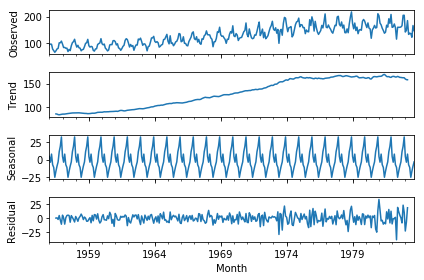

In [31]:
#Another method of decomposition
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
seasonal_decompose(train["Monthly beer production"]).plot()
result=adfuller(train["Monthly beer production"])
plt.show()

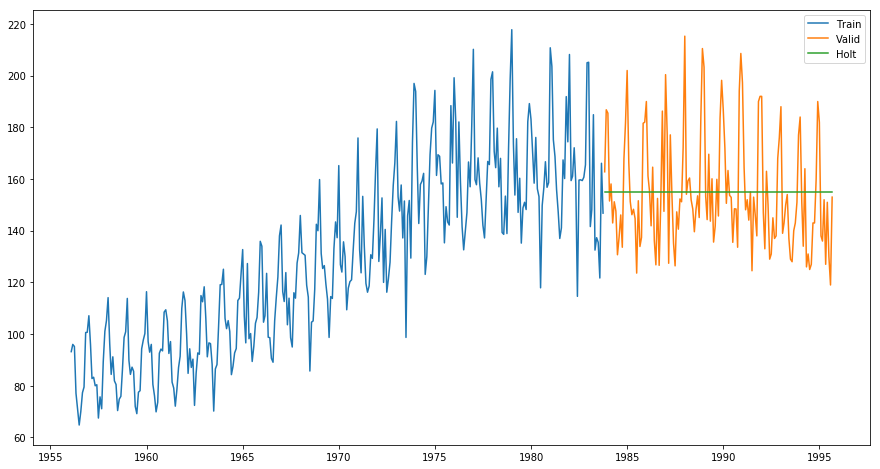

In [32]:
#Holt
from statsmodels.tsa.holtwinters import Holt
y_hat=valid.copy()
fit1=Holt(np.asarray(train["Monthly beer production"]), damped=True).fit(smoothing_level=0.1, smoothing_slope=0.02)
y_hat["Holt's Linear Model"]=fit1.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["Holt's Linear Model"], label="Holt")
plt.legend(loc="best")

In [33]:
rmse=np.sqrt(mean_squared_error(y_hat["Holt's Linear Model"], valid["Monthly beer production"]))
rmse

21.50946666747458

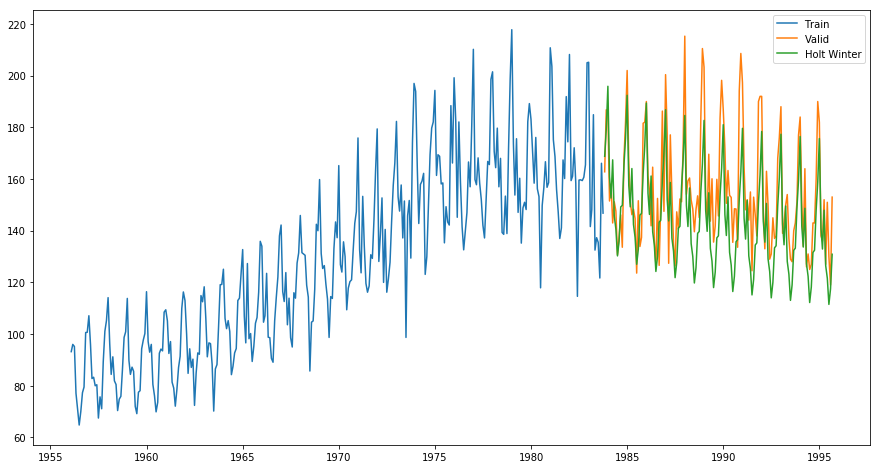

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat=valid.copy()
fit2=ExponentialSmoothing(np.asarray(train["Monthly beer production"]), trend="add", damped=True, seasonal="add", seasonal_periods=12).fit()
y_hat["Holt Winter"]=fit2.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["Holt Winter"], label="Holt Winter")
plt.legend(loc="best")

In [38]:
rmse=np.sqrt(mean_squared_error(valid["Monthly beer production"], y_hat["Holt Winter"]))
rmse

16.765994061945225

Results of Dickey Fuller Test:
Test statistic             -1.435984
P-Value                     0.564908
Number of Lags             17.000000
Number of Observations    315.000000
Critical values: 1%        -3.451281
Critical values: 5%        -2.870760
Critical values: 10%       -2.571682
dtype: float64


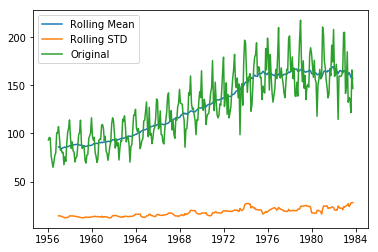

In [53]:
#Dickey Fuller Test
#Determine rolling stats, plot, then dickey fuller
from statsmodels.tsa.api import adfuller
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    
    rolling_mean_graph=plt.plot(rolmean, label="Rolling Mean")
    rolling_std_graph=plt.plot(rolstd, label="Rolling STD")
    original=plt.plot(timeseries, label="Original")
    plt.legend(loc="best")
    
    print("Results of Dickey Fuller Test:")
    dftest=adfuller(timeseries, autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=["Test statistic", "P-Value", "Number of Lags", "Number of Observations"])
    for key, value in dftest[4].items():
        dfoutput["Critical values: %s"%key]=value
    print(dfoutput)
test_stationarity(train["Monthly beer production"])
#Test statistic is less than critical values, so 

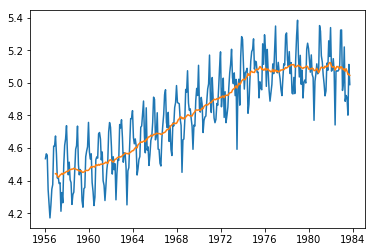

In [56]:
#log transformation
train_log=np.log(train["Monthly beer production"])
valid_log=np.log(valid["Monthly beer production"])
avg=train_log.rolling(12).mean()
plt.plot(train_log)
plt.plot(avg)

Results of Dickey Fuller Test:
Test statistic             -2.354426
P-Value                     0.155014
Number of Lags             13.000000
Number of Observations    308.000000
Critical values: 1%        -3.451761
Critical values: 5%        -2.870970
Critical values: 10%       -2.571794
dtype: float64


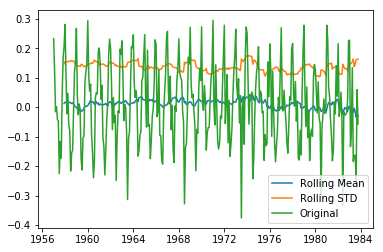

In [60]:
#removing increasing trend
log_diff=train_log-avg
log_diff.dropna(inplace=True)
test_stationarity(log_diff)
#Test stat is still less than critical values, use differencing and decomposition

Results of Dickey Fuller Test:
Test statistic             -4.947369
P-Value                     0.000028
Number of Lags             16.000000
Number of Observations    315.000000
Critical values: 1%        -3.451281
Critical values: 5%        -2.870760
Critical values: 10%       -2.571682
dtype: float64


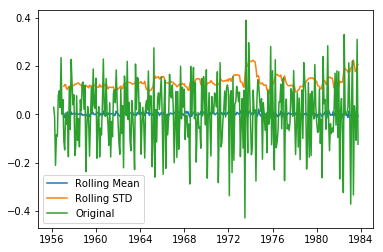

In [62]:
#differencing
diff=train_log-train_log.shift(1)
diff.dropna(inplace=True)
test_stationarity(diff)
#Using differencing leads to the test statistic being less than the critical values.

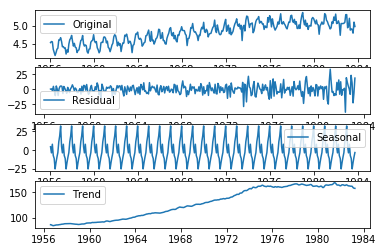

In [74]:
#Decomposing
from statsmodels.tsa.api import seasonal_decompose
decompose=seasonal_decompose(train["Monthly beer production"], freq=12)
residual=decompose.resid
seasonal=decompose.seasonal
trend=decompose.trend
plt.subplot(411)
plt.plot(train_log,label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(residual, label="Residual")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

Results of Dickey Fuller Test:
Test statistic           -8.988820e+00
P-Value                   6.981526e-15
Number of Lags            1.500000e+01
Number of Observations    3.050000e+02
Critical values: 1%      -3.451974e+00
Critical values: 5%      -2.871063e+00
Critical values: 10%     -2.571844e+00
dtype: float64


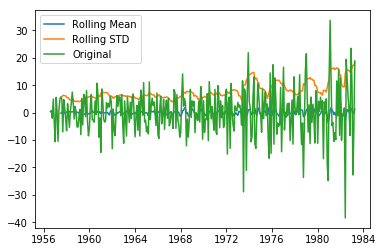

In [83]:
#Check out residual
residual=decompose.resid
resid_data=residual
resid_data.dropna(inplace=True)
test_stationarity(resid_data)
#Stationary

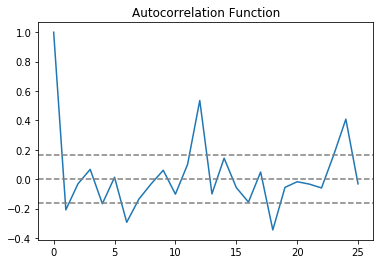

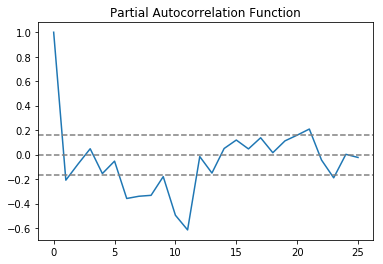

In [96]:
#Graph ACF, PACF graphs
from statsmodels.tsa.api import acf, pacf
lag_acf_graph=acf(diff, nlags=25)
lag_pacf_graph=pacf(diff, nlags=25, method="ols")
plt.plot(lag_acf_graph)
plt.axhline(y=0, linestyle="--", color="grey")
plt.axhline(y=(1.96*(1/(np.sqrt(len(valid))))), linestyle="--", color="grey")
plt.axhline(y=(-1.96*(1/(np.sqrt(len(valid))))), linestyle="--", color="grey")
plt.title("Autocorrelation Function")
plt.show()
plt.plot(lag_pacf_graph)
plt.axhline(y=0, linestyle="--", color="grey")
plt.axhline(y=(1.96*(1/(np.sqrt(len(valid))))), linestyle="--", color="grey")
plt.axhline(y=(-1.96*(1/(np.sqrt(len(valid))))), linestyle="--", color="grey")
plt.title("Partial Autocorrelation Function")
plt.show()

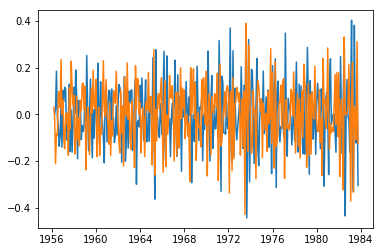

In [104]:
#ARIMA Model
#AR(Auto-Regressive) Model
from statsmodels.tsa.api import ARIMA
model=ARIMA(diff, order=(2,1,0))
ar_model=model.fit(disp=-1)
plt.plot(ar_model.fittedvalues)
plt.plot(diff)

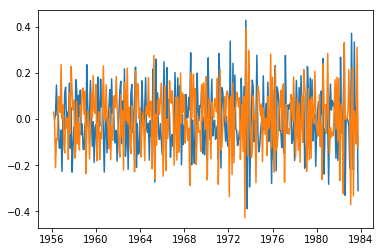

In [107]:
#ARIMA Model
#MA(Moving) Model
from statsmodels.tsa.api import ARIMA
model=ARIMA(diff, order=(0,1,1))
ma_model=model.fit(disp=-1)
plt.plot(ma_model.fittedvalues)
plt.plot(diff)

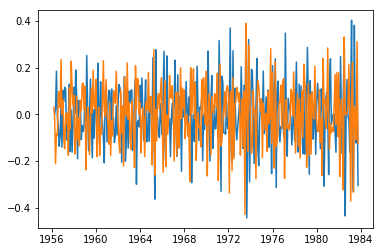

In [143]:
#Combined Model
from statsmodels.tsa.api import ARIMA
model=ARIMA(diff, order=(2,1,0))
combined_model=model.fit(disp=-1)
plt.plot(combined_model.fittedvalues)
plt.plot(diff)

Text(0.5, 1.0, 'RMSE: 5.4945')

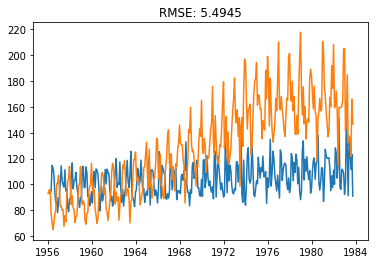

In [144]:
#Taking it back to original scale
combined=pd.Series(combined_model.fittedvalues)
#CumSum
combined_cumsum=combined.cumsum()
combined_model=pd.Series(train_log.iloc[0], index=train_log.index) #Series starting from the 0th element
combined_model=combined_model.add(combined_cumsum, fill_value=0)
combined_model_exp=np.exp(combined_model)
plt.plot(combined_model_exp)
plt.plot(train["Monthly beer production"])
plt.title("RMSE: %.4f" %(np.sqrt(sum((train_log-combined_model_exp)**2))/(len(train_log))))

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


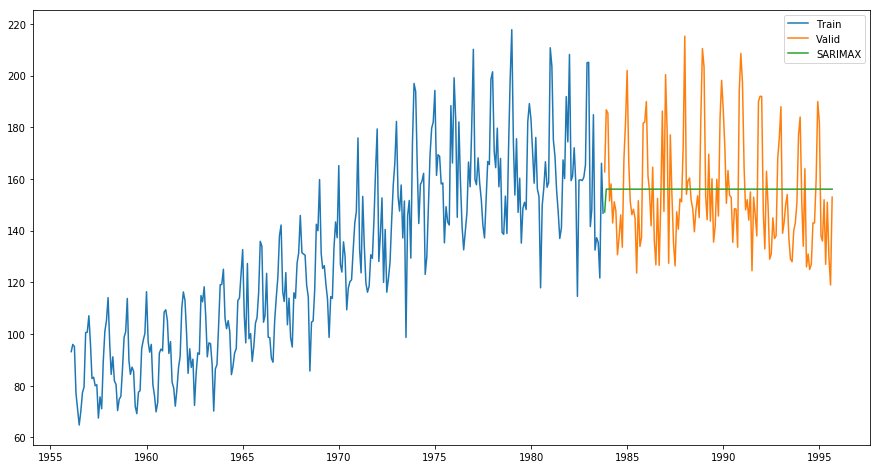

In [158]:
#SARIMAX Model
y_hat=valid.copy()
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train["Monthly beer production"], order=(0,1,2), sesonal_order=(0,1,1,12)).fit()
y_hat["SARIMAX"]=model_SARIMA.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train["Monthly beer production"], label="Train")
plt.plot(valid["Monthly beer production"], label="Valid")
plt.plot(y_hat["SARIMAX"], label="SARIMAX")
plt.legend(loc="best")

In [159]:
rmse=np.sqrt(mean_squared_error(y_hat["SARIMAX"], valid["Monthly beer production"]))
rmse

21.566997172606584